In [1]:
####################################################################
###    This is the PYTHON version of program 5.3 from page 184 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is a model for Rabit Hemorrhagic Disease, in which both     #
### transmission rate and birth rates can be seasonally forced.    #
### Note that we are using numbers of individuals in this formulation.#
### Bifurcation plots are not possible with this code.             #
####################################################################

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

In [3]:
beta0=0.936;
beta1=0.1;
gamma=0.025;
alpha0=0.02;
alpha1=0.1;
mu=0.01;
m=0.475;
K=10000;
X0=0.5;
Y0=0.01;
N0=0.6;
Years = 60
ND=MaxTime=Years*365;
TS=1.0;

In [4]:
INPUT=np.array((X0, Y0, N0))

In [5]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	t=np.mod(t,365)
	alpha = alpha0*(1+alpha1*np.sin(2*np.pi*t/365))
	beta = beta0*(1+beta1*np.sin(2*np.pi*t/365))
	Y[0] = alpha * V[2]- beta*V[0]*V[1] - (mu+V[2]/K) * V[0] # dX/dt
	Y[1] = beta*V[0]*V[1] - (mu + m + gamma + V[2]/K) * V[1] # dY/dt
	Y[2] = (alpha - mu - V[2]/K) * V[2] - m * V[1]
	return Y   # For odeint

In [6]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print(RES)

[[0.5        0.01       0.6       ]
 [0.50238154 0.00960256 0.60132694]
 [0.50493421 0.00924977 0.60286688]
 ...
 [0.54879308 0.01425874 0.59315791]
 [0.5477956  0.0142847  0.59224007]
 [0.54679784 0.01431    0.5913214 ]]


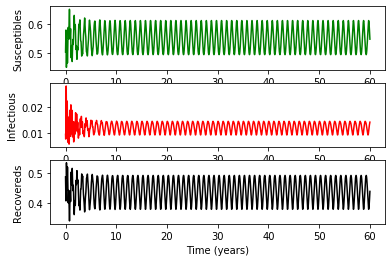

In [7]:
t=(np.arange(ND)/365.)
#Ploting
pl.subplot(311)
pl.plot(t,RES[1:,0], 'g', label='S')
pl.xlabel ('Time (years)')
pl.ylabel ('Susceptibles')
pl.subplot(312)
pl.plot(t,RES[1:,1], 'r', label='I')
pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(313)
pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovereds')

pl.show()